ORGANICS

Содержание проблемы: супермаркет начинает предлагать новую линию органических продуктов. Руководство супермаркета хотело бы определить, какие покупатели могут приобрести эти продукты.
В супермаркете действует программа лояльности клиентов. В качестве первоначального плана стимулирования покупателей супермаркет предоставлял купоны на свои органические продукты всем участникам программы лояльности и теперь собирает данные, которые включают информацию о том, приобрели ли эти клиенты какие-либо из органических продуктов или нет.  

In [3]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source

In [4]:
df = pd.read_csv("C:\ORGANICS.csv",encoding="cp1251")
print(df.shape) 
print(df.info())

(22223, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
ID                 22223 non-null int64
DemAffl            21138 non-null float64
DemAge             20715 non-null float64
DemCluster         21549 non-null float64
DemClusterGroup    21549 non-null object
DemGender          19711 non-null object
DemReg             21758 non-null object
DemTVReg           21758 non-null object
PromClass          22223 non-null object
PromSpend          22223 non-null float64
PromTime           21942 non-null float64
TargetBuy          22223 non-null int64
TargetAmt          22223 non-null int64
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB
None


In [5]:
# Проверка на пропущенные данные
df.isnull().any().any()

True

In [6]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        return mis_val_table_ren_columns

In [7]:
missing_values_table(df)

,Missing Values,% of Total Values
DemGender,2512,11.3
DemAge,1508,6.8
DemAffl,1085,4.9
DemCluster,674,3.0
DemClusterGroup,674,3.0
DemReg,465,2.1
DemTVReg,465,2.1
PromTime,281,1.3


In [8]:
# Замена Nan усредненными значениями
df = df.fillna(df.mean())

In [9]:
x = df[['DemAffl',  'DemAge', 'DemCluster', 'PromSpend', 'PromTime']]
y = df['TargetBuy']
y = y.astype('int')

Обучение модели:

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
dtree = DecisionTreeClassifier(max_depth=4, random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

Найдем метрики:

Сonfusion matrix 

In [13]:
from sklearn.metrics import confusion_matrix
y_pred = dtree.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[4629,  389],
       [ 945,  704]], dtype=int64)

 Mean Consequential Error

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.799910004499775

Recall

In [17]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.4269254093389933

Presicion

In [18]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.6440988106129918

F - value

In [19]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.5134938001458789

In [ ]:
Balanced accuracy

In [20]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.6747022423339047

Matthews correlation coefficient

In [21]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)

0.4072026241498428

Cohen’s Kappa

In [22]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.39399994548997697

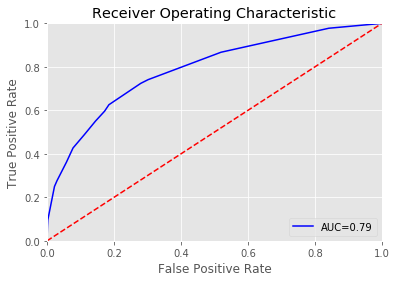

In [28]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
pred_prob = dtree.predict_proba(X_test)
pred = pred_prob[:, -1]
fpr, tpr, threshold = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC=%0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()